###  <h1><center>Задача $3.1$</center></h1>
## <h1><center>Агафонов Артём</center></h1>

In [0]:
import numpy as np  
import matplotlib.pylab as plt
import scipy.stats as st

In [0]:
from statsmodels.stats.multitest import multipletests

## Постановка эксперимента


**Данные:**

$n=20, \quad m \in [200, \ldots, 100000], \quad m_0=150$,

$\mathbf{X}_i \sim \mathcal{N}(\mathbf{0}, \mathbf{I}), \quad i=1,\dots,m_0;$

$\mathbf{X}_i \sim \mathcal{N}(\mathbf{1}, \mathbf{I}), \quad i=m_0+1,\dots,m;$

$\mathbf{X}_i \in \mathbb{R}^n.$


**Гипотезы:**

$H^i_0: \mathsf{E}\mathbf{X}_i = 0$;

$H^i_1: \mathsf{E}\mathbf{X}_i \neq 0$;




## Генерация данных

In [0]:
rs = np.random.RandomState(42)

alpha = 0.05
Ms = [200, 300, 500, 700, 1000, 2000, 5000, 10000, 20000, 50000, 70000, 100000]
M0s = [150, 220, 390, 550, 700, 1520, 3800, 6900, 16500, 38000, 57000, 78000]
n = 20
data = []


for i in range(len(Ms)):
  X = rs.randn(Ms[i], n) 
  X[M0s[i]:]+=1
  data.append(X)

## Гистограммы
Построим гистограммы для нескольких значений $m$ и $m_0$.

Text(0.5, 1.0, 'm = 100000, m0 = 78000')

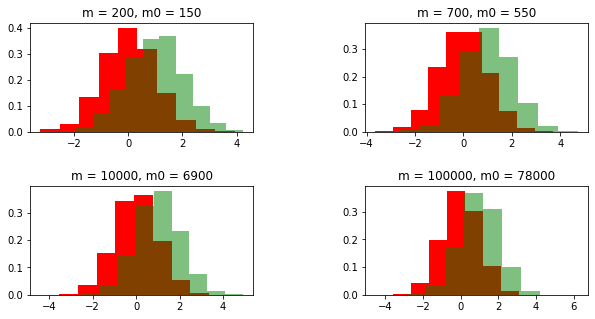

In [23]:
fig, axs = plt.subplots(2, 2, gridspec_kw={'hspace': 0.5, 'wspace': 0.5}, figsize=(10,5))
axs[0, 0].hist(data[0][:M0s[0]].flatten(), color='r', density=True)
axs[0, 0].hist(data[0][M0s[0]:].flatten(), color='g', alpha=0.5, density=True)
axs[0, 0].set_title('m = {}, m0 = {}'.format(len(data[0]), M0s[0]))
axs[0, 1].hist(data[3][:M0s[3]].flatten(), color='r', density=True)
axs[0, 1].hist(data[3][M0s[3]:].flatten(), color='g', alpha=0.5, density=True)
axs[0, 1].set_title('m = {}, m0 = {}'.format(len(data[3]), M0s[3]))
axs[1, 0].hist(data[7][:M0s[7]].flatten(), color='r', density=True)
axs[1, 0].hist(data[7][M0s[7]:].flatten(), color='g', alpha=0.5, density=True)
axs[1, 0].set_title('m = {}, m0 = {}'.format(len(data[7]), M0s[7]))
axs[1, 1].hist(data[-1][:M0s[-1]].flatten(), color='r', density=True)
axs[1, 1].hist(data[-1][M0s[-1]:].flatten(), color='g', alpha=0.5, density=True)
axs[1, 1].set_title('m = {}, m0 = {}'.format(len(data[-1]), M0s[-1]))

In [24]:
i = 0
for X in data:  
  p_values = []
  # zero mean
  rejected = 0
  for x in X[:M0s[i]]:
    if st.ttest_1samp(x, 0)[1] <= alpha:
        rejected += 1
  print ('m = ' + str(len(X)) + ' m0 = ' + str(M0s[i]))
  print ('True: H0; H1 non-accepted:', M0s[i] - rejected)
  print ('True: H0; H0 rejected:', rejected)

  # non-zero mean
  rejected = 0
  for x in X[M0s[i]:]:
     if st.ttest_1samp(x, 0)[1] <= alpha:
          rejected += 1

  print ('True: H1; H1 non-accepted:', len(X)-M0s[i] - rejected)
  print ('True: H1; H0 rejected:', rejected)
  print('')
  print ('_________________________________')
  i +=  1

m = 200 m0 = 150
True: H0; H1 non-accepted: 139
True: H0; H0 rejected: 11
True: H1; H1 non-accepted: 0
True: H1; H0 rejected: 50

_________________________________
m = 300 m0 = 220
True: H0; H1 non-accepted: 212
True: H0; H0 rejected: 8
True: H1; H1 non-accepted: 0
True: H1; H0 rejected: 80

_________________________________
m = 500 m0 = 390
True: H0; H1 non-accepted: 369
True: H0; H0 rejected: 21
True: H1; H1 non-accepted: 0
True: H1; H0 rejected: 110

_________________________________
m = 700 m0 = 550
True: H0; H1 non-accepted: 520
True: H0; H0 rejected: 30
True: H1; H1 non-accepted: 3
True: H1; H0 rejected: 147

_________________________________
m = 1000 m0 = 700
True: H0; H1 non-accepted: 661
True: H0; H0 rejected: 39
True: H1; H1 non-accepted: 0
True: H1; H0 rejected: 300

_________________________________
m = 2000 m0 = 1520
True: H0; H1 non-accepted: 1424
True: H0; H0 rejected: 96
True: H1; H1 non-accepted: 8
True: H1; H0 rejected: 472

_________________________________
m = 5000 

## График уровней значимости
Воспользуемся модифицированной функцией отрисовки уровней значимости с семинара. 

In [0]:
def plot_diff_alpha(p_values, m0,loc_plt=None):

    if loc_plt is None:
        return None
    argsorted_p = np.argsort(p_values)
    false = []
    true = []
    for i, id in enumerate(argsorted_p):   
        if id>m0:
            false.append((i, p_values[id]))
        else:
            true.append((i, p_values[id]))
    
    loc_plt.scatter(*zip(*true), label='True hypothesis', c='b')
    loc_plt.scatter(*zip(*false), label='False hypothesis', c='r')
    loc_plt.legend(loc='best')
    
    return loc_plt

Построим графики нескорректированных уровней значимости для некоторых $m$ и $m_0$.

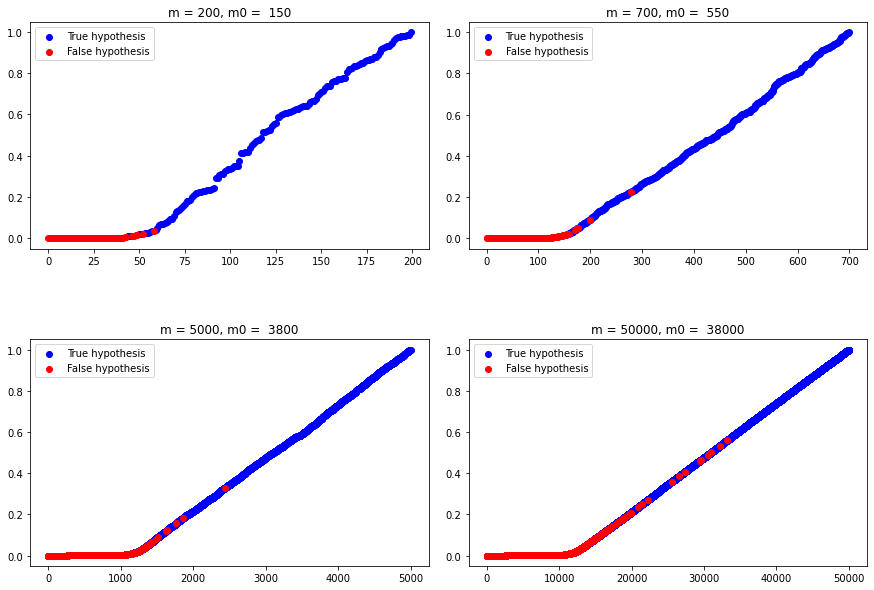

In [26]:
p_values = []
for X in data:
  ps = []
  for x in X:
    ps.append(st.ttest_1samp(x, 0)[1])
  p_values.append(ps)

fig, axs = plt.subplots(2, 2, gridspec_kw={'hspace': 0.4, 'wspace': 0.1}, figsize=(15,10))
k = 0
for i in range(2):
  for j in range(2):
    axs[i, j].set_title( 'm = {}, m0 =  {}'.format(len(p_values[k]), M0s[k]))
    plot_diff_alpha(p_values[k], M0s[k], loc_plt=axs[i, j])
    k += 3   

## FDR

Основная идея FDR заключается в том, что мы пытаемся найти p-value в семействе тестов, который мы сможем использовать как границу, отделяющую отвергнутые гипотезы.

По определению 

$$FDR = \mathbb{E} \frac{V}{R},$$ 

где 

*   $V = FP$ -- число false positives(ненаблюдаемая величина),
*   $R$ --  число отвергнутых нулевых гипотез(наблюдаемая величина).






## Истинный FDR
Для начала рассчитаем истенное значение FDR. Мы можем его вычислить т.к. знаем $m_0$.

### Без поправки

In [27]:
i = 0
for X in data: 
  p_values = []
  # zero mean
  V = 0
  X = data[0]
  for x in X[:M0s[i]]:
    if st.ttest_1samp(x, 0)[1] <= alpha:
        V += 1
  # non-zero mean
  R = 0
  for x in X[M0s[i]:]:
     if st.ttest_1samp(x, 0)[1] <= alpha:
          R += 1
  print ('m = ' + str(Ms[i]) + ' FDR = ' + str(round(V/(V+R), 4)))
  i = i + 1

m = 200 FDR = 0.1803
m = 300 FDR = 1.0
m = 500 FDR = 1.0
m = 700 FDR = 1.0
m = 1000 FDR = 1.0
m = 2000 FDR = 1.0
m = 5000 FDR = 1.0
m = 10000 FDR = 1.0
m = 20000 FDR = 1.0
m = 50000 FDR = 1.0
m = 70000 FDR = 1.0
m = 100000 FDR = 1.0


### Поправка Холма

In [28]:
i = 0
for X in data: 
  p_values = []
  # zero mean
  V = 0
  ps = []
  for x in X[:M0s[i]]:
    ps = np.append(ps, st.ttest_1samp(x, 0)[1])
  ps = multipletests(ps, method='holm')[1]
  for p in ps:
    if p <= alpha:
      V += 1

  # non-zero mean
  R = 0
  for x in X[M0s[i]:]:
     ps = np.append(ps, st.ttest_1samp(x, 0)[1])
  ps = multipletests(ps, method='holm')[1]
  for p in ps:
     if p <= alpha:
       R += 1
  print ('m = ' + str(Ms[i]) + ' FDR = ' + str(round(V/(V+R), 4)))
  i = i + 1

m = 200 FDR = 0.0
m = 300 FDR = 0.0
m = 500 FDR = 0.0
m = 700 FDR = 0.0
m = 1000 FDR = 0.0095
m = 2000 FDR = 0.0
m = 5000 FDR = 0.0
m = 10000 FDR = 0.0
m = 20000 FDR = 0.0
m = 50000 FDR = 0.0
m = 70000 FDR = 0.0
m = 100000 FDR = 0.0


### Поправка Бенджамини - Хохберга

In [29]:
i = 0
for X in data: 
  p_values = []
  # zero mean
  V = 0
  ps = []
  for x in X[:M0s[i]]:
    ps = np.append(ps, st.ttest_1samp(x, 0)[1])
  ps = multipletests(ps, method='fdr_bh')[1]
  for p in ps:
    if p <= alpha:
      V += 1

  # non-zero mean
  R = 0
  for x in X[M0s[i]:]:
     ps = np.append(ps, st.ttest_1samp(x, 0)[1])
  ps = multipletests(ps, method='fdr_bh')[1]
  for p in ps:
     if p <= alpha:
       R += 1
  print ('m = ' + str(Ms[i]) + ' FDR = ' + str(round(V/(V+R), 4)))
  i = i + 1

m = 200 FDR = 0.0
m = 300 FDR = 0.0
m = 500 FDR = 0.0
m = 700 FDR = 0.0
m = 1000 FDR = 0.0035
m = 2000 FDR = 0.0
m = 5000 FDR = 0.0
m = 10000 FDR = 0.0
m = 20000 FDR = 0.0
m = 50000 FDR = 0.0
m = 70000 FDR = 0.0
m = 100000 FDR = 0.0


### Вывод

*   Если мы не делаем никаких поправок, то нет контроля над FDR.
*   Поправка Бенджамини-Хохберга осуществляет контроль над FDR теоретически(для этого она и используется), поэтому работает и на практике.
*   Оказалось, что поправка Холма также работает на практике. 




## Эксперимент 

Т.к. на самом деле мы не знаем FDR (нет значения $m_0$), то мы можем использовать FDR как границу для числа ошибок первого рода.

Пусть $i$-ый тест имеет p-value $p_i$. Всего у нас $m$ тестов. Если мы хотим использовать $p_i$ как границу, то
$$ \mathbb{E}V = \mathbb{E}FP = m \times p_i .$$
Наша цель -- найти такое p-value, чтобы  число false positive ошибок составляло малую часть ($\alpha = 0.05 $) от числа отвергнутых нулевых гипотез. Если мы импользуем $p_i$ как границу, то $R = i.$ Следовательно   
$$\frac{m \times p_i}{i} \leq \alpha.$$

Таким образом, на графиках мы будем строить величну $\dfrac{\alpha \times i}{m}.$

### Без поправок

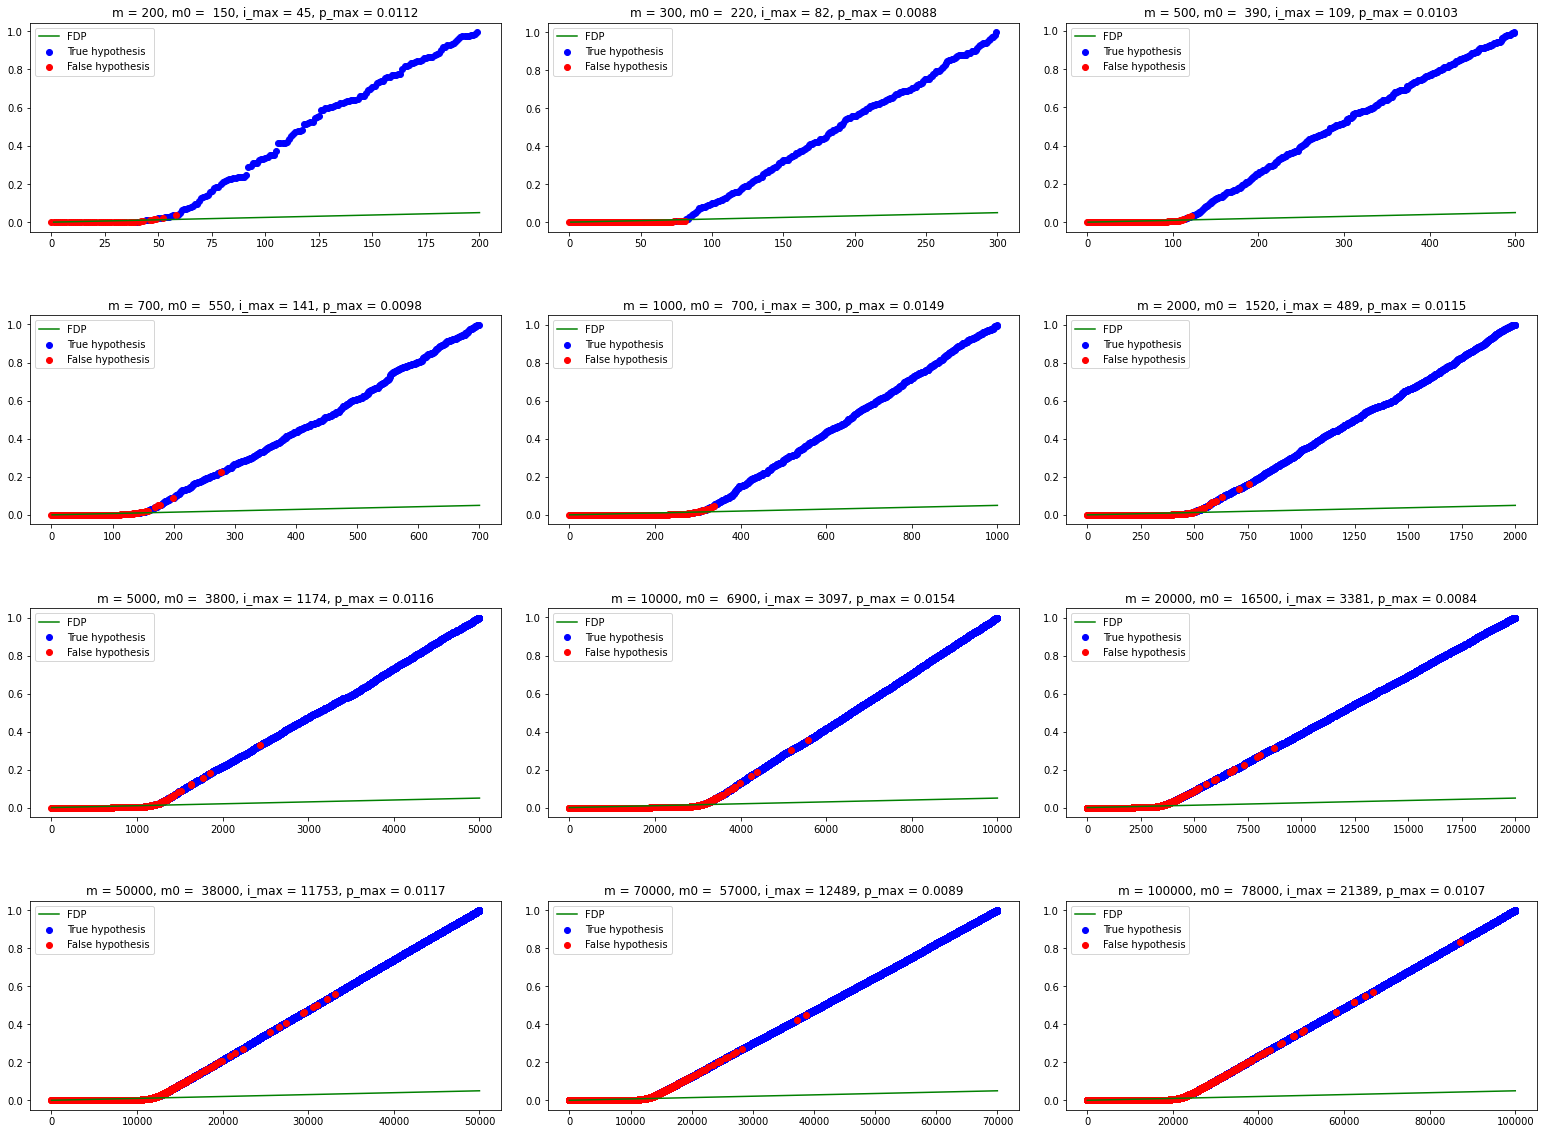

In [30]:
Is_nocor = []
Ps_nocor = []


import math
p_values = []
for X in data:
  ps = []
  
  for x in X:
    ps.append(st.ttest_1samp(x, 0)[1])
  p_values.append(ps)

fig, axs = plt.subplots(4, 3, gridspec_kw={'hspace': 0.4, 'wspace': 0.1}, figsize=(27,20))
#fig, axs = plt.subplots(2, 2, gridspec_kw={'hspace': 0.4, 'wspace': 0.1}, figsize=(15,10))
alpha = 0.05
k = 0
for i in range(4):
  for j in range(3):
    I = np.arange(1, Ms[k]+1)
    i_max = np.max(np.where(np.sort(p_values[k]) < (alpha * I / Ms[k]))[0])
    p_max = np.sort(p_values[k])[i_max]
    Is_nocor.append(i_max)
    Ps_nocor.append(p_max)

    axs[i, j].set_title( 'm = {}, m0 =  {}, i_max = {}, p_max = {}'.format(len(p_values[k]), M0s[k], i_max + 1, round(p_max, 4)))
    axs[i, j].plot(I, alpha * I / Ms[k], 'g', label='FDP')
    plot_diff_alpha(p_values[k], M0s[k],loc_plt=axs[i, j])
    k += 1

### Поправка Холма

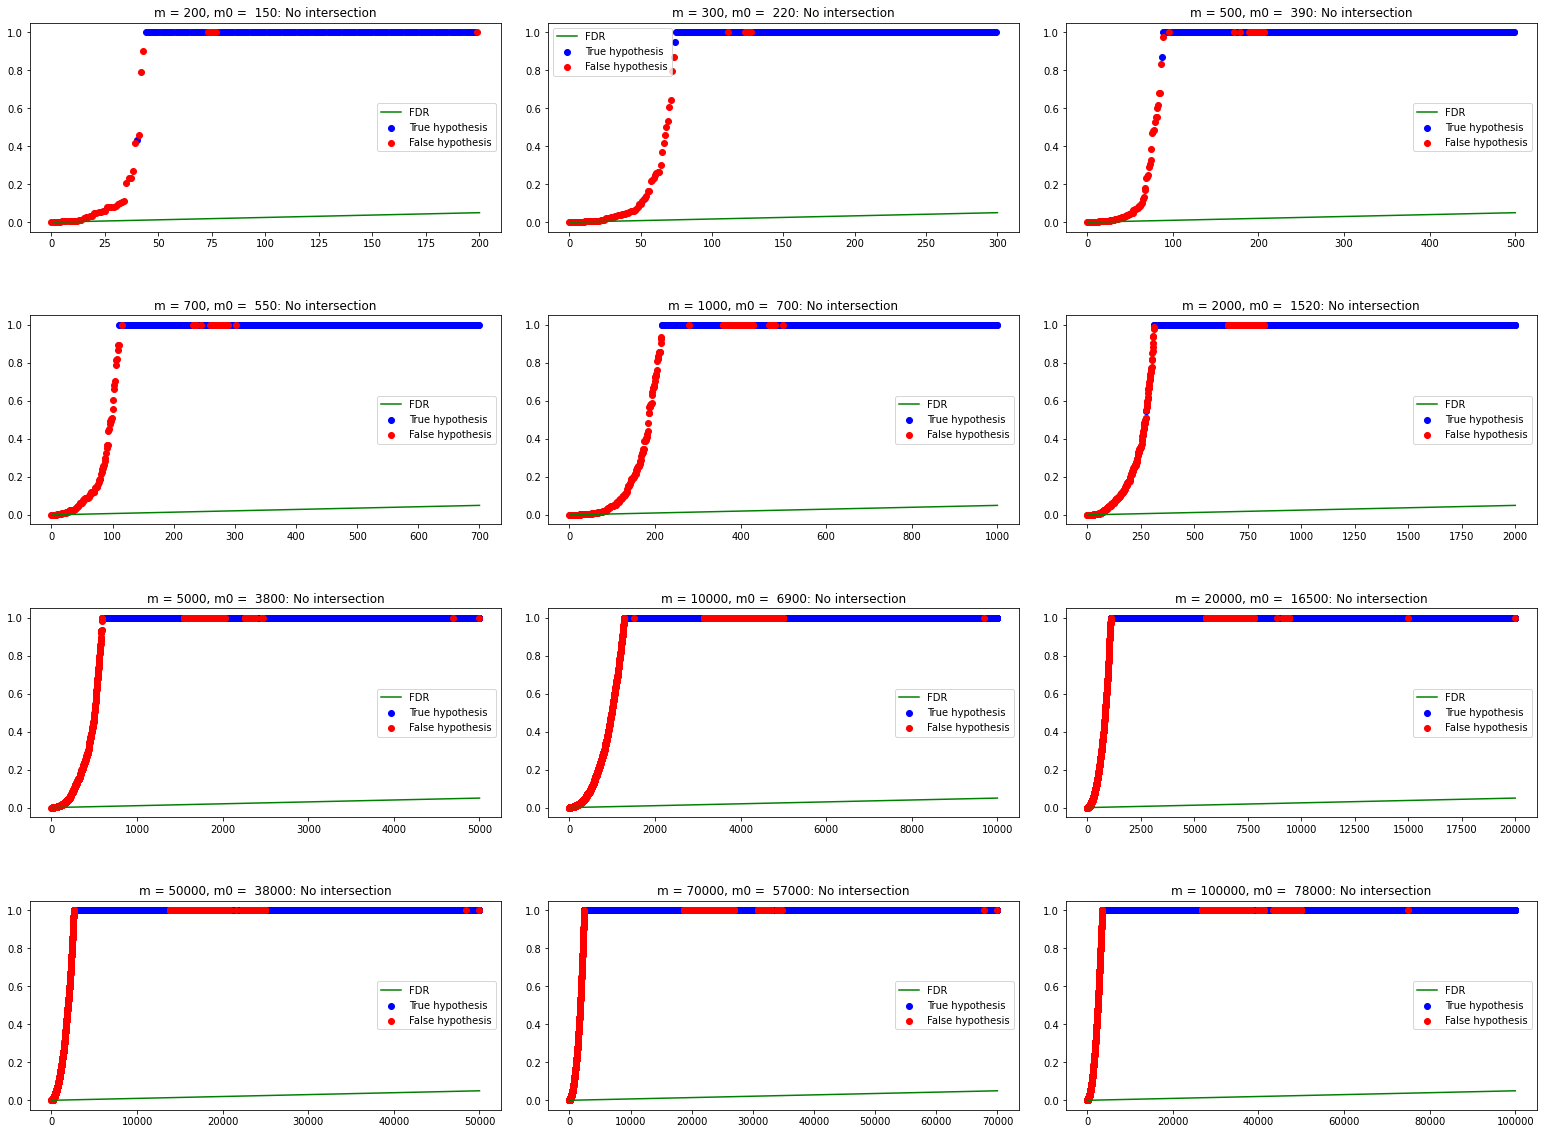

In [31]:
Is_holm = []
Ps_holm = []


import math
p_values = []
for X in data:
  ps = []
  for x in X:
    ps.append(st.ttest_1samp(x, 0)[1])
  ps = multipletests(ps, method='holm')[1]     
  p_values.append(ps)

fig, axs = plt.subplots(4, 3, gridspec_kw={'hspace': 0.4, 'wspace': 0.1}, figsize=(27,20))
#fig, axs = plt.subplots(2, 2, gridspec_kw={'hspace': 0.4, 'wspace': 0.1}, figsize=(15,10))
alpha = 0.05
k = 0
for i in range(4):
  for j in range(3):
    I = np.arange(1, Ms[k]+1)
    below = np.where(np.sort(p_values[k]) < (alpha * I / Ms[k])[0])
    # print(len(below))
    if len(below) > 1:
      i_max = np.max(below)
      p_max = np.sort(p_values[k])[i_max]
      axs[i, j].set_title( 'm = {}, m0 =  {}, i_max = {}, p_max = {}'.format(len(p_values[k]), M0s[k], i_max + 1, round(p_max, 4)))
      Is_holm.append(i_max)
      Ps_holm.append(p_max)
    else:
      axs[i, j].set_title( 'm = {}, m0 =  {}: No intersection'.format(len(p_values[k]), M0s[k], i_max + 1, round(p_max, 4)))
      Is_holm.append(0)
      Ps_holm.append(0)


    

    
    axs[i, j].plot(I, alpha * I / Ms[k], 'g', label='FDR')
    plot_diff_alpha(p_values[k], M0s[k], loc_plt=axs[i, j])
    k += 1

### Поправка Бенджамини - Хохберга

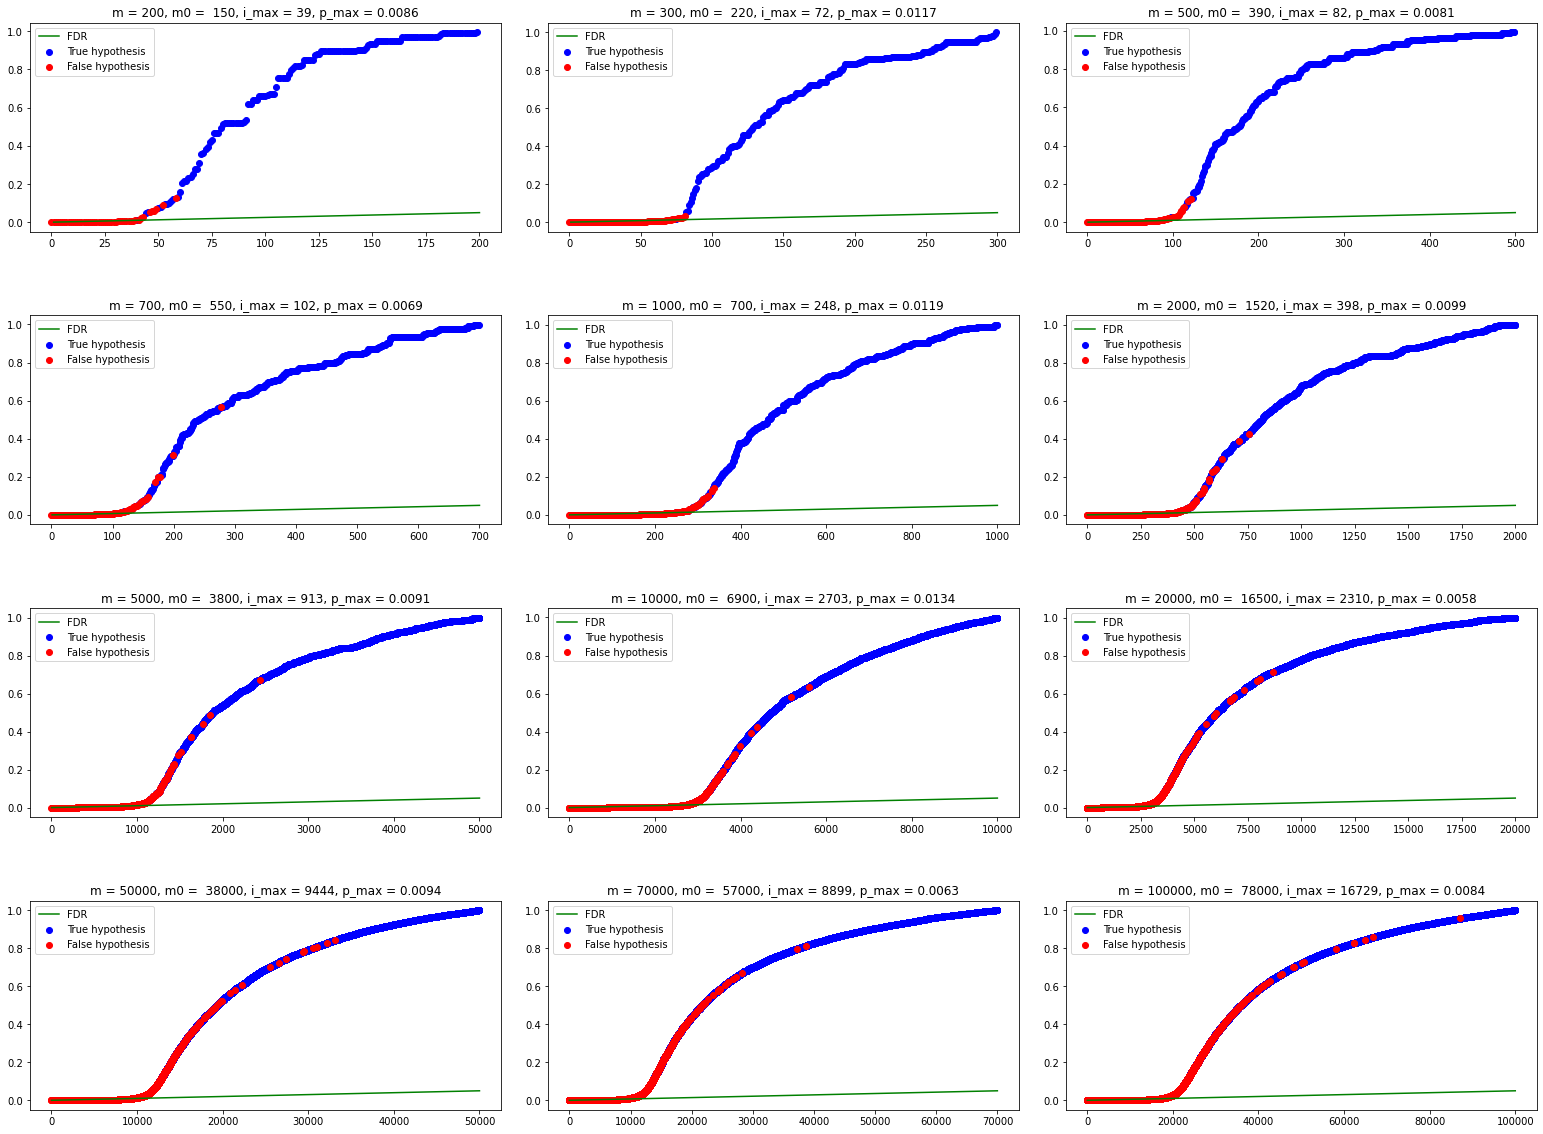

In [32]:
Is_bh = []
Ps_bh = []


import math
p_values = []
for X in data:
  ps = []
  for x in X:
    ps.append(st.ttest_1samp(x, 0)[1])
  ps = multipletests(ps, method='fdr_bh')[1]     
  p_values.append(ps)

fig, axs = plt.subplots(4, 3, gridspec_kw={'hspace': 0.4, 'wspace': 0.1}, figsize=(27,20))
#fig, axs = plt.subplots(2, 2, gridspec_kw={'hspace': 0.4, 'wspace': 0.1}, figsize=(15,10))
alpha = 0.05
k = 0
for i in range(4):
  for j in range(3):
    I = np.arange(1, Ms[k]+1)
    i_max = np.max(np.where(np.sort(p_values[k]) < (alpha * I / Ms[k]))[0])
    p_max = np.sort(p_values[k])[i_max]
    Is_bh.append(i_max)
    Ps_bh.append(p_max)

    axs[i, j].set_title( 'm = {}, m0 =  {}, i_max = {}, p_max = {}'.format(len(p_values[k]), M0s[k], i_max + 1, round(p_max, 4)))
    axs[i, j].plot(I, alpha * I / Ms[k], 'g', label='FDR')
    plot_diff_alpha(p_values[k], M0s[k], loc_plt=axs[i, j])
    k += 1

## Анализ графиков и результаты
 
FDR контролирует отношение ошибок первого рода к числу отвергнутых нулевых гипотез.

Таким образом, исходя из полученных результатоы мы можем оценить количество ошибок первого рода и сравнить его с истинным количеством ошибок первого рода (т.к. знаем $m_0$, хотя по-настоящему не можем его наблюдать):
$$\hat{FP} = i_{\max} \times \alpha .$$

In [0]:
exp_nocor = np.asarray(Is_nocor) * alpha
exp_bh = np.asarray(Is_bh) * alpha
exp_holm = np.asarray(Is_holm) * alpha

In [0]:
def count_type1(data, tresholds, method = None):
  res = []
  i = 0
  for X in data:  
    p_values = []
    rejected = 0
    ps = []
    if method == None:
        for x in X[:M0s[i]]:
          if st.ttest_1samp(x, 0)[1] <= alpha and st.ttest_1samp(x, 0)[1] <= tresholds[i]:
            rejected += 1

    else:
      for x in X[:M0s[i]]:
        ps.append(st.ttest_1samp(x, 0)[1])
      ps = multipletests(ps, method=method)[1]
      for p in ps:
        if p <= alpha and p <= tresholds[i]:
          rejected += 1
    res.append(rejected)




    print ('m = ' + str(len(X)) + ' m0 = ' + str(M0s[i]))
    print ('True: H0; H0 rejected:', rejected)
    i = i + 1
  return res

In [35]:
type1_nocor = count_type1(data, Ps_nocor)
type1_holm = count_type1(data, Ps_holm, 'holm')
type1_bh = count_type1(data, Ps_bh, 'fdr_bh')

m = 200 m0 = 150
True: H0; H0 rejected: 2
m = 300 m0 = 220
True: H0; H0 rejected: 2
m = 500 m0 = 390
True: H0; H0 rejected: 6
m = 700 m0 = 550
True: H0; H0 rejected: 3
m = 1000 m0 = 700
True: H0; H0 rejected: 13
m = 2000 m0 = 1520
True: H0; H0 rejected: 35
m = 5000 m0 = 3800
True: H0; H0 rejected: 47
m = 10000 m0 = 6900
True: H0; H0 rejected: 120
m = 20000 m0 = 16500
True: H0; H0 rejected: 157
m = 50000 m0 = 38000
True: H0; H0 rejected: 461
m = 70000 m0 = 57000
True: H0; H0 rejected: 473
m = 100000 m0 = 78000
True: H0; H0 rejected: 780
m = 200 m0 = 150
True: H0; H0 rejected: 0
m = 300 m0 = 220
True: H0; H0 rejected: 0
m = 500 m0 = 390
True: H0; H0 rejected: 0
m = 700 m0 = 550
True: H0; H0 rejected: 0
m = 1000 m0 = 700
True: H0; H0 rejected: 0
m = 2000 m0 = 1520
True: H0; H0 rejected: 0
m = 5000 m0 = 3800
True: H0; H0 rejected: 0
m = 10000 m0 = 6900
True: H0; H0 rejected: 0
m = 20000 m0 = 16500
True: H0; H0 rejected: 0
m = 50000 m0 = 38000
True: H0; H0 rejected: 0
m = 70000 m0 = 57000
T

In [37]:
print(type1_nocor < exp_nocor)

[ True  True False  True  True False  True  True  True  True  True  True]


Видим, что гарантия почти выполнена.

В том, что у нас получилось, что число ошибок первого рода методом Холма и Б-Х равно нулю нет ничего удивительного. В их формулы выходит уровень значимости $\alpha = 0.05$ и в простроении нашего графика мы использовали такой же параметр. Поэтому все значения и оказались выше прямой.